<a href="https://colab.research.google.com/github/Ajay-2007/Algorithmic-Trading/blob/main/3_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
!wget -nc https://lazyprogrammer.me/course_files/airline_passengers.csv

File ‘airline_passengers.csv’ already there; not retrieving.



In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [32]:
df = pd.read_csv("airline_passengers.csv", index_col='Month', parse_dates=True)

In [33]:
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


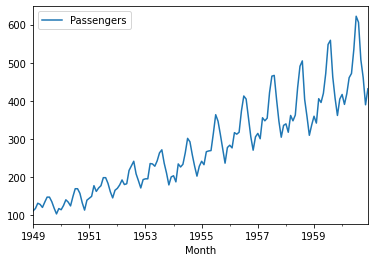

In [34]:
df.plot()

In [35]:
df['1stdiff'] = df['Passengers'].diff()

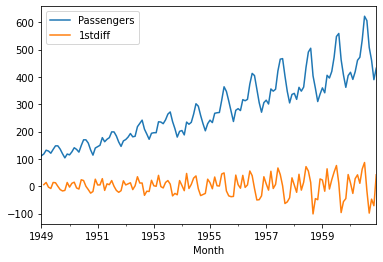

In [36]:
df.plot()

In [37]:
df['LogPassengers']  = np.log(df['Passengers'])

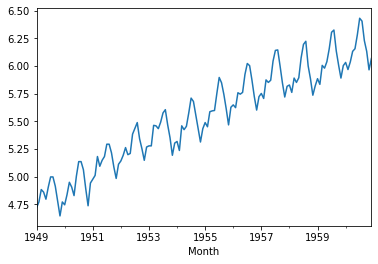

In [38]:
df['LogPassengers'].plot()

In [39]:
from statsmodels.tsa.arima_model import ARIMA

In [40]:
df.index.freq = 'MS'

Ntest = 12
train = df.iloc[:-Ntest]
test = df.iloc[-Ntest:]

In [41]:
arima = ARIMA(train['Passengers'], order=(1, 0, 0))

In [42]:
arima_result = arima.fit()

In [43]:
df.loc[:-Ntest, 'AR(1)'] = arima_result.predict(start=train.index[0], end=train.index[-1])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  """Entry point for launching an IPython kernel.


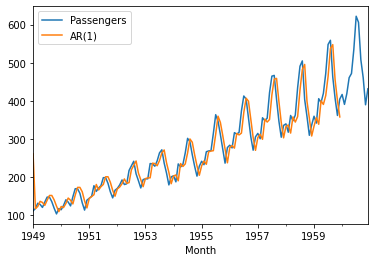

In [44]:
df[['Passengers', 'AR(1)']].plot()

In [45]:
forecast, stderr, confint = arima_result.forecast(Ntest)
df.loc[-Ntest:, 'AR(1)'] = forecast

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  


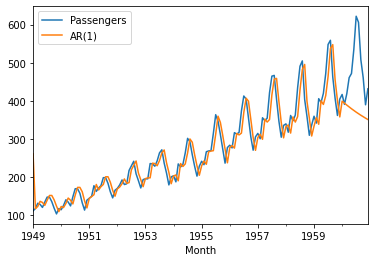

In [46]:
df[['Passengers', 'AR(1)']].plot()

In [47]:
def plot_fit_and_forecast(result):
  fix, ax = plt.subplots(figsize=(10, 5))
  ax.plot(df['Passengers'], label='data')

  # plot the curve fitted on train set
  train_pred = result.fittedvalues
  ax.plot(train.index, train_pred, color='green', label='fitted')

  # forecast the test set
  forecast, stderr, confint = result.forecast(Ntest)
  ax.plot(test.index, forecast, label='forecast')
  ax.fill_between(test.index, \
                  confint[:,0], confint[:,1], \
                  color='red', alpha=0.4)
  
  ax.legend()

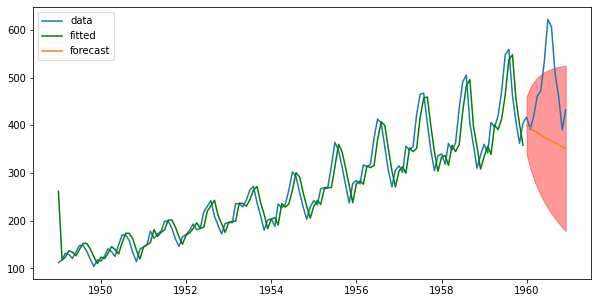

In [48]:
plot_fit_and_forecast(arima_result)

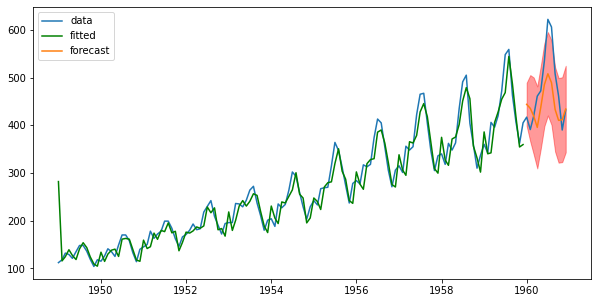

In [49]:
arima = ARIMA(train['Passengers'], order=(10, 0, 0)) # AR(10)
arima_result = arima.fit()
plot_fit_and_forecast(arima_result)

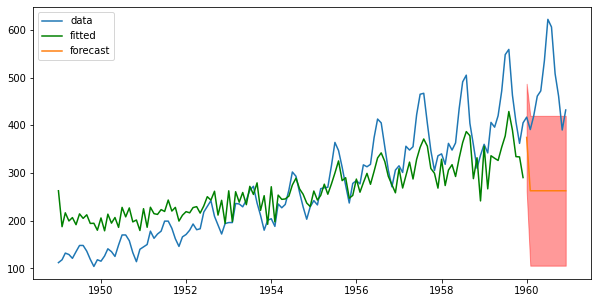

In [50]:
arima = ARIMA(train['Passengers'], order=(0, 0, 1)) # MA(1)
arima_result = arima.fit()
plot_fit_and_forecast(arima_result)

In [51]:
df['Log1stDiff'] = df['LogPassengers'].diff()

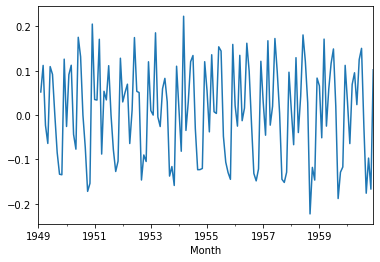

In [52]:
df['Log1stDiff'].plot()

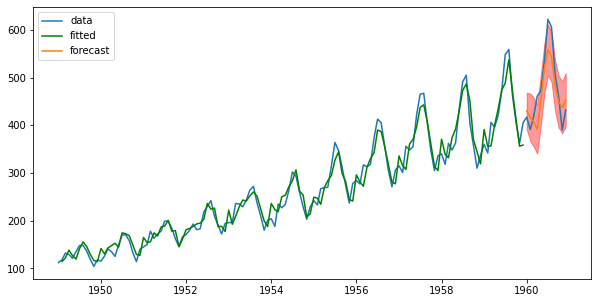

In [53]:
arima = ARIMA(train['Passengers'], order=(8, 1, 1))
arima_result_811 = arima.fit()


def plot_fit_and_forecast_int(result, d, col='Passengers'):
  fix, ax = plt.subplots(figsize=(10, 5))
  ax.plot(df[col], label='data')


  # plot the curve fitted on train set
  train_pred = result.predict(start=train.index[d], end=train.index[-1], \
                              typ='levels')
  
  ax.plot(train.index[d:], train_pred, color='green', label='fitted')

  # forecast the test set
  forecast, stderr, confint = result.forecast(Ntest)
  ax.plot(test.index, forecast, label='forecast')
  ax.fill_between(test.index, \
                  confint[:,0], confint[:,1], \
                  color='red', alpha=0.4)
  
  ax.legend()

plot_fit_and_forecast_int(arima_result_811, 1)

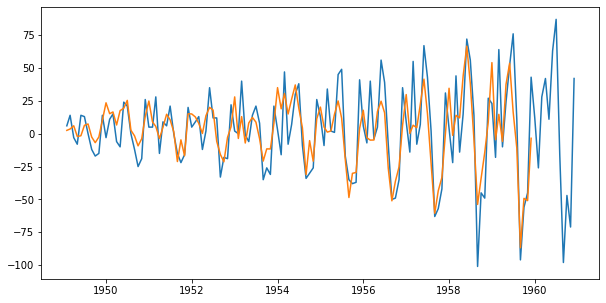

In [55]:
def plot_difference(result, d, col='Passengers'):
  train_pred = result.predict(start=train.index[d], end=train.index[-1])
  # train_pred = result.fittedvalues
  diff = df[col].diff()
  fix, ax = plt.subplots(figsize=(10, 5))
  ax.plot(diff, label='true 1st difference')
  ax.plot(train_pred, label='fitted 1st different')

plot_difference(arima_result_811, 1)

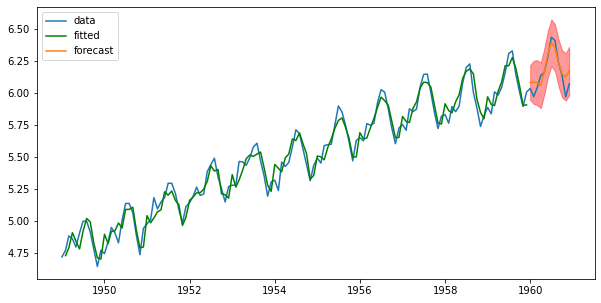

In [56]:
arima = ARIMA(train['LogPassengers'], order=(8,1, 1))
arima_result_log811 = arima.fit()
plot_fit_and_forecast_int(arima_result_log811, 1, col='LogPassengers')

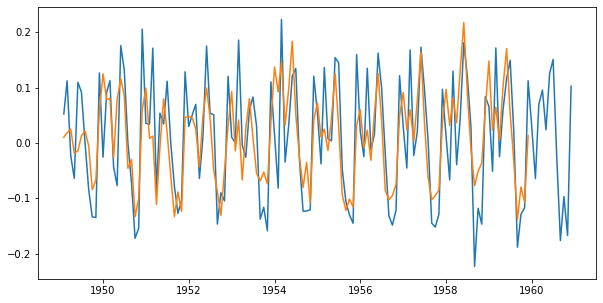

In [57]:
plot_difference(arima_result_log811, 1, col='LogPassengers')

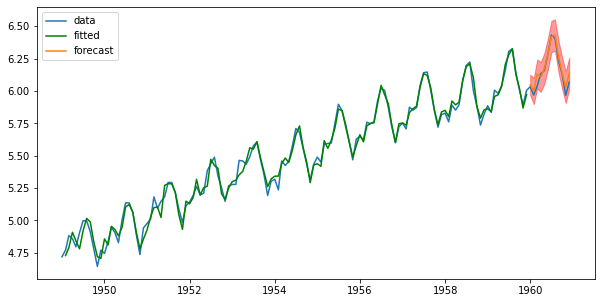

In [58]:
arima = ARIMA(train['LogPassengers'], order=(12,1, 0))
arima_result_log1210 = arima.fit()
plot_fit_and_forecast_int(arima_result_log1210, 1, col='LogPassengers')

In [62]:
def rmse(result, is_logged):
  forecast, stderr, confint = result.forecast(Ntest)
  if is_logged:
    forecast = np.exp(forecast)
  
  t = test['Passengers']
  y = forecast
  return np.sqrt(np.mean((t - y)**2))

In [63]:
print("ARIMA(8, 1, 1):", rmse(arima_result_811, False))
print("ARIMA(8, 1, 1 logged:", rmse(arima_result_log811, True))
print("ARIMA(12, 1, 0) logged:", rmse(arima_result_log1210, True))

ARIMA(8, 1, 1): 38.5507018892895
ARIMA(8, 1, 1 logged: 32.224066916694085
ARIMA(12, 1, 0) logged: 18.61205204159123
